In [1]:
%matplotlib inline
from nilearn import plotting, image
import os
import shutil
import matplotlib.pylab as plt
import nibabel as nb
import numpy.linalg as npl
import numpy as np

In [2]:
#sub="/Applications/freesurfer/subjects/fsaverage5/"
sub = "/Users/franzliem/Desktop/ds114_test1_freesurfer_precomp_v6.0.0/sub-01/"

brain = sub + "mri/brain.mgz"
aseg = sub + "mri/aseg.mgz"

hemis = ["lh", "rh"]
hemi_full = {"lh":"left", "rh":"right"}

# parcellation

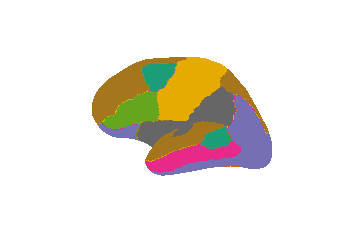

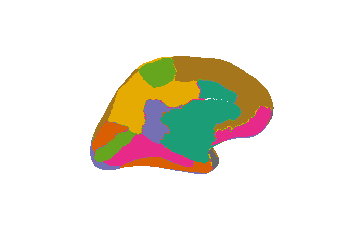

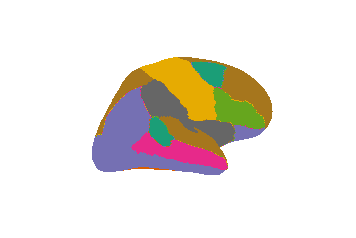

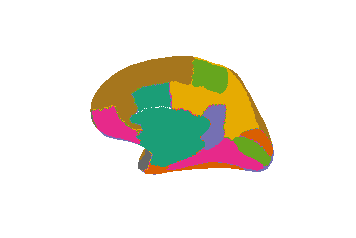

In [3]:
for hemi in hemis:
    surf = os.path.join(sub, "surf/{hemi}.inflated".format(hemi=hemi))
    annot = os.path.join(sub, "label/{hemi}.aparc.annot".format(hemi=hemi))
    for view in ["lateral", "medial"]:
        plotting.plot_surf(surf, annot, cmap="Dark2", view=view, hemi=hemi_full[hemi],alpha=1);

# segmentation

/Users/franzliem/anaconda3/envs/nilearn_dev/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


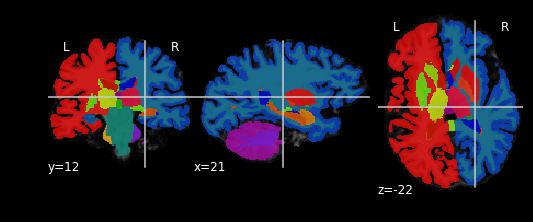

In [4]:
plotting.plot_roi(aseg, brain, cmap="prism")

# surfs

In [5]:
def mm_2_vox(img, coords):
    return nb.affines.apply_affine(np.linalg.inv(img.affine), coords)
def vox_2_mm(img, coords):
    return nb.affines.apply_affine(img.affine, coords)

In [6]:
def load_contour(surf_path, aseg_path):
    input_surf = nb.freesurfer.read_geometry(surf_path,read_metadata=True)
    cras = input_surf[2]["cras"]
    surf_coords_mm = input_surf[0]
    # there is probably a better (more general) way to do the offset?
    offset = np.repeat([[cras[0],cras[2],-cras[1]]], len(surf_coords_mm), axis=0)

    cont_img = nb.load(aseg_path)
    cont = cont_img.get_data()
    cont.fill(False)

    surf_coords = np.floor(mm_2_vox(cont_img, surf_coords_mm) - offset).astype(np.int) 
    cont[surf_coords[:,0], surf_coords[:,1], surf_coords[:,2]] = True
    return cont_img

In [7]:
lhw = load_contour(surf_path=sub+"surf/lh.white", aseg_path=aseg)
rhw = load_contour(surf_path=sub+"surf/rh.white", aseg_path=aseg)
lhp = load_contour(surf_path=sub+"surf/lh.pial", aseg_path=aseg)
rhp = load_contour(surf_path=sub+"surf/rh.pial", aseg_path=aseg)

def add_and_num_surfs(s1, s2, n, binarize=True):
    surf = s1
    data = s1.get_data()
    data += s2.get_data()
    if binarize:
        data[data>0] = 1
    data *= n
    return surf

white = add_and_num_surfs(lhw, rhw, 1)
pial = add_and_num_surfs(lhp, rhp, 2)
overlays = add_and_num_surfs(white, pial, 1, binarize=False)

/Users/franzliem/anaconda3/envs/nilearn_dev/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


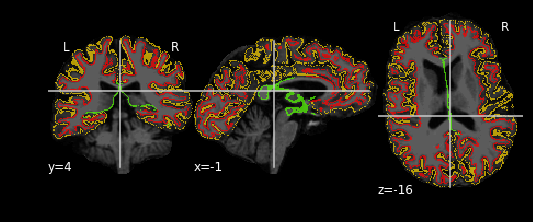

In [8]:
plotting.plot_roi(overlays , brain, cmap="prism")